<a href="https://colab.research.google.com/github/aydawudu/A-B-test-results-in-Tableau/blob/main/NLP(Recurrent_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
dataset, info=tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset=dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXRFUO2/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXRFUO2/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXRFUO2/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer=info.features['text'].encoder

In [5]:
BUFFER_SIZE=10000
BATCH_SIZE=64

train_dataset=train_dataset.shuffle(BUFFER_SIZE)
train_dataset=train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset=test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
num_epochs=10
history=model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1040s 3s/step - loss: 0.5078 - accuracy: 0.7436 - val_loss: 0.4834 - val_accuracy: 0.8105
Epoch 2/10
391/391 [==============================] - 1035s 3s/step - loss: 0.3779 - accuracy: 0.8432 - val_loss: 0.4149 - val_accuracy: 0.8266
Epoch 3/10
391/391 [==============================] - 1053s 3s/step - loss: 0.2938 - accuracy: 0.8897 - val_loss: 0.4437 - val_accuracy: 0.8228
Epoch 4/10
391/391 [==============================] - 1060s 3s/step - loss: 0.2514 - accuracy: 0.9066 - val_loss: 0.4268 - val_accuracy: 0.8301
Epoch 5/10
391/391 [==============================] - 1051s 3s/step - loss: 0.2149 - accuracy: 0.9212 - val_loss: 0.5356 - val_accuracy: 0.8079
Epoch 6/10
391/391 [==============================] - 1042s 3s/step - loss: 0.2765 - accuracy: 0.8878 - val_loss: 0.7302 - val_accuracy: 0.6680
Epoch 7/10
391/391 [==============================] - 1039s 3s/step - loss: 0.1936 - accuracy: 0.9262 - val_loss: 0.5030 - val_accuracy:

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

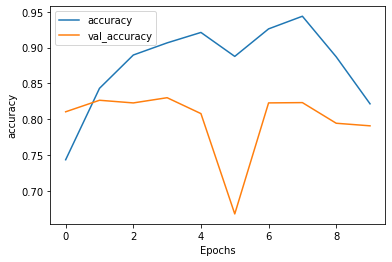

In [12]:
plot_graphs(history, 'accuracy')


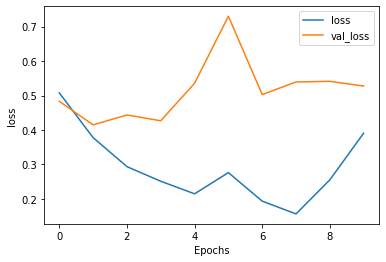

In [13]:
plot_graphs(history, 'loss')